# Part B
## Build the network of Country Performers

#### Use a regular expression to extract all outgoing links from each of the pages you downloaded above.

- Start by making a single page work. Do some debugging to make sure it's actually working.
- Then slowly build the loops over performers/pages to take your little operation to industrial scale
- You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.


In [3]:
import os
import re

folder_path = 'performer_files'

# Regular expression pattern to match wiki links
pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        links = re.findall(pattern, text)
        unique_links = set(links)

        print(f"Outgoing links in {filename}:")
        for link in unique_links:
            print(link)
        print('-' * 40)



Outgoing links in Harry_McClintock.txt:
I Love Lucy
Joe Hill (activist)
The Old Chisholm Trail
Category:American country guitarists
The Big Rock Candy Mountains
Blue Monday Jamboree
Jim Thompson (writer)
O Brother, Where Art Thou? (soundtrack)
Category:American male guitarists
Category:Singer-songwriters from Tennessee
Bea Benaderet
American Society of Composers, Authors and Publishers
Victor Talking Machine Company
author
busker
The Preacher and the Slave
The West (miniseries)
cowboy
union organizer
Farmington, Utah
Free Speech Fight
Category:Guitarists from Tennessee
Screen Actors Guild
Category:Country musicians from Tennessee
Billboard (magazine)
Category:American country singer-songwriters
Category:American male composers
Category:20th-century American singer-songwriters
YouTube
poet
Category:1882 births
Category:Musicians from Knoxville, Tennessee
Category:20th-century American composers
Meredith Willson
Industrial Workers of the World
KFRC (defunct)
Frank Little (unionist)
Smith

#### For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.


In [4]:
folder_path = 'performer_files'
link_pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'  # Pattern to match wiki links
performer_pattern = r'\[\[([^\]|]+)(?:\|([^\]]+))?\]\]'  # Pattern to extract performer names

# Load performer names from 'performers.txt' into a set for quick lookup
with open('performers.txt', 'r', encoding='utf-8') as file:
    performers = re.findall(performer_pattern, file.read())
    performer_set = {p[0] for p in performers}

# Create a dictionary to store the performer links for each file
all_performer_links = {}

# Process each file in the folder and save matching performer links
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        links = re.findall(link_pattern, file.read())
        performer_links = set(link for link in links if link in performer_set)
    
    # Store the performer links for this file
    all_performer_links[filename] = performer_links
    
    print(f"Outgoing performer links in {filename}:")
    if performer_links:
        print("\n".join(performer_links))
    else:
        print("No performer links found.")
    print('-' * 40)



Outgoing performer links in Harry_McClintock.txt:
No performer links found.
----------------------------------------
Outgoing performer links in Haley_&_Michaels.txt:
Lonestar
Richie McDonald
----------------------------------------
Outgoing performer links in Dickey_Betts.txt:
Gregg Allman
Frank Hannon
Vassar Clements
----------------------------------------
Outgoing performer links in Two_Tons_of_Steel.txt:
Dwight Yoakam
----------------------------------------
Outgoing performer links in Bacon_Brothers.txt:
No performer links found.
----------------------------------------
Outgoing performer links in Cledus_T._Judd.txt:
Ray Stevens
Tracy Lawrence
Daryle Singletary
Trace Adkins
Colt Ford
Kenny Chesney
Lisa Marie Presley
Shania Twain
Brad Paisley
Ronnie Dunn
Eagles (band)
Heidi Newfield
Tim McGraw
Julie Reeves
Naomi Judd
Laura Bell Bundy
Brantley Gilbert
Alan Jackson
Deana Carter
Mindy McCready
Florida Georgia Line
Montgomery Gentry
Joe Diffie
Morgan Wallen
Brooks & Dunn
Deborah Allen

#### Use a NetworkX DiGraph to store the network.

In [5]:
import networkx as nx

# Ensure that all_performer_links is defined and contains the extracted links

# Create a directed graph to store the performer network
G = nx.DiGraph()

# Add each performer as a node in the graph
G.add_nodes_from(performer_set)

# Add edges to the graph (from filename to each outgoing performer link)
for filename, performer_links in all_performer_links.items():
    # Add directed edges from the file to each performer link
    for performer in performer_links:
        G.add_edge(filename, performer)


print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 3911
Number of edges: 17609


In [6]:

# Function to count words in a given text
def count_words(text):
    # Use regex to match words (ignoring symbols and punctuation)
    words = re.findall(r'\b\w+\b', text)
    return len(words)

# Process each file to get the content length and store it as a node attribute for the performer
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
        # Count the number of words in the file
        word_count = count_words(text)
        
        # Assuming the filename contains the performer's name, you can match it to the performers
        for performer in performer_set:
            if performer.replace(" ", "_") in filename:  # Match performer with filename
                # Store the word count as a node attribute for the performer
                G.nodes[performer]['word_count'] = word_count

# Optionally, print the word count for each performer node
for node, data in G.nodes(data=True):
    if 'word_count' in data:
        print(f"{node}: {data['word_count']}")

Kathy Mattea: 8182
Dean Brody: 4753
Claude King: 2774
Gretchen Peters: 1372
Travis Denning: 1726
Freddie Hart: 3446
Hardy (singer): 2480
Larry Cordle: 774
Whitey Morgan and the 78's: 1485
McAlyster: 498
Sixwire: 1095
Elvis Presley: 33740
Jimmy Webb: 7980
Juice Newton: 3863
Robin and Linda Williams: 730
Shooter Jennings: 5475
Raquel Cole: 2063
The Boxmasters: 3342
Run C&W: 582
Michelle Nixon: 2171
Delbert McClinton: 3258
Codie Prevost: 1382
Ella Langley: 2108
Johnny Cash: 20358
The Forester Sisters: 4428
Ashton Shepherd: 1749
Sir Rosevelt: 849
Barbi Benton: 2606
Due West (band): 1103
John Arthur Martinez: 450
The Wilsons (country duo): 1015
Rascal Flatts: 10056
Turner Nichols: 844
Moe Bandy: 1206
Richard Bennett (guitarist): 740
Morgan Wade (singer): 2745
Flynnville Train: 1051
Jeffrey Foucault: 696
David Lindley (musician): 4077
The Kentucky Headhunters: 9413
Nick 13: 1926
Drake Milligan: 1595
Darren McGinnis: 607
Bon Jovi: 13586
Mary Duff: 985
Michael Martin Murphey: 6189
Halfway to H

#### When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then discard those disconnected nodes from the network.

In [7]:
# Check for disconnected nodes (nodes with 0 in-degree and 0 out-degree)
disconnected_nodes = [node for node in G.nodes() if G.degree(node) == 0]

# Optionally, print disconnected nodes to check for any mistakes
if disconnected_nodes:
    print("Disconnected nodes (no in- or out-degrees):")
    print(disconnected_nodes)

# Remove disconnected nodes from the graph
G.remove_nodes_from(disconnected_nodes)

# Optionally, print basic graph info after removing disconnected nodes
print(f"Remaining nodes: {G.number_of_nodes()}")
print(f"Remaining edges: {G.number_of_edges()}")


Disconnected nodes (no in- or out-degrees):
['Freddie Hart', 'Codie Prevost', 'Barbi Benton', 'Turner Nichols', 'Morgan Wade (singer)', 'Nick 13', 'Darren McGinnis', 'Mary Duff', 'Jason Jones (country singer)', 'Texas Lightning (band)', 'Amie Comeaux', 'Terry Fell', 'Colt Prather', 'Kylie Morgan', "Gene O'Quin", 'Warner Mack', 'Heartland (band)', 'Jacob Lyda', 'Autumn Hill', 'Maury Finney', 'Darryl & Don Ellis', 'Herb Jeffreys', 'Jamie Lynn Spears', 'Sam Riggs', 'Flatland Cavalry', 'Kalie Shorr', 'Ennis Sisters', 'Ray Vega (singer)', 'Shawna Russell', 'Randy Howard (country singer)', 'Kris Tyler', 'Luke Stricklin', 'Chuck Wagon & the Wheels', 'Rednex', 'Eck Robertson', 'Tyler Rich', 'Matt Kennon', 'Brent Anderson (singer)', 'Drake White', 'Marlee Scott', 'Daniel Romano', 'Jonny Diaz', 'Williams Riley', 'Ridley Bent', 'Crossin Dixon', 'Sasha Pieterse', 'Eric Heatherly', 'Caroline Jones (singer)', 'Glen Templeton', 'Steve Moakler', 'Twister Alley', 'P!nk', 'Tracey Brown', 'Big Smo', "Bil

#### Finally, extract the largest component - it will make our work with visualisations much easier (note: removing isolated nodes (with no links) does not guarantee that you are left with the largest component).

In [8]:
# Find all weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Extract the largest component (component with the most nodes)
largest_component = max(weakly_connected_components, key=len)

# Create a subgraph of the largest component
G_largest = G.subgraph(largest_component).copy()

# Optionally, print basic info about the largest component
print(f"Number of nodes in the largest component: {G_largest.number_of_nodes()}")
print(f"Number of edges in the largest component: {G_largest.number_of_edges()}")


Number of nodes in the largest component: 3459
Number of edges in the largest component: 17590


#### Plot the in and out-degree distributions for the entire network

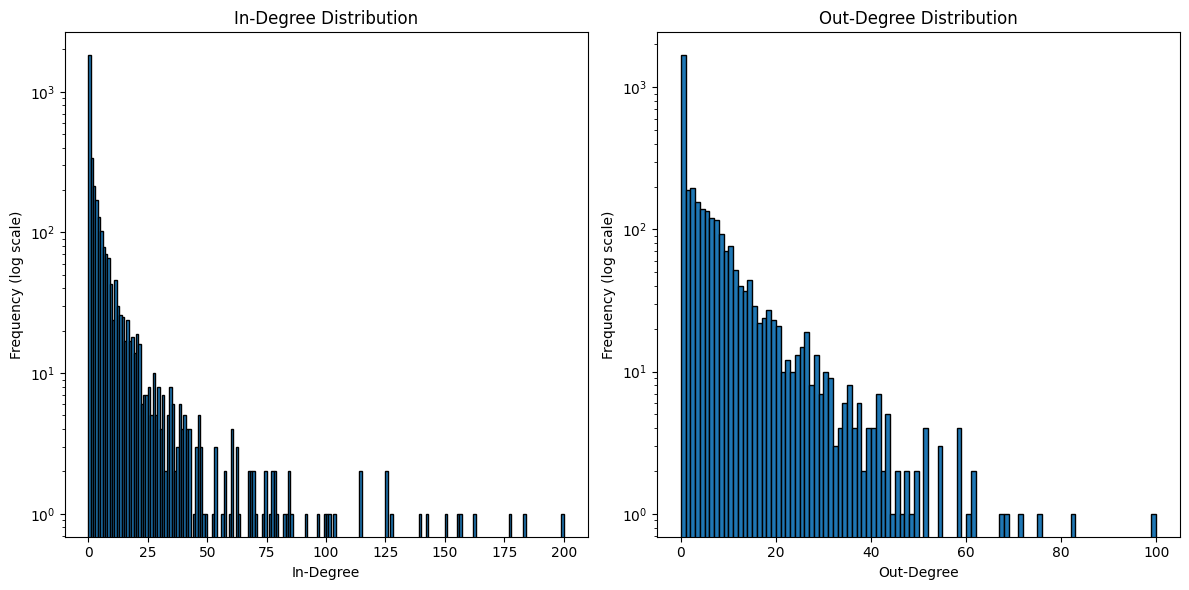

In [9]:
import matplotlib.pyplot as plt
# Get the in-degrees and out-degrees of all nodes in the graph
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Plot the in-degree distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot for in-degrees
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), edgecolor='black', log=True)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency (log scale)')

# Plot the out-degree distribution
plt.subplot(1, 2, 2)  # Second subplot for out-degrees
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), edgecolor='black', log=True)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (log scale)')

# Show the plots
plt.tight_layout()
plt.show()
